In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Import dataset

In [2]:
math_df = pd.read_csv(r'student-mat.csv', sep=';')
por_df = pd.read_csv(r'student-por.csv', sep=';')

Add class column

In [3]:
math_df['class'] = 'math'
por_df['class'] = 'portuguese'

Concatenate student performance data into one dataset

In [4]:
dfs = [math_df, por_df]
data = pd.concat(dfs)
data['passed'] = data['G3'] >= 15
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,class,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,math,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,math,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,math,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,math,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,math,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,portuguese,False
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,portuguese,True
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,portuguese,False
647,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,portuguese,False


Preprocess data for decision tree

In [5]:
from sklearn import preprocessing
values = data.values
le = preprocessing.LabelEncoder()
for i in range(35):
    values[:,i] = le.fit_transform(values[:,i])
    
tree_data = pd.DataFrame(values)

Split data into training and test

In [6]:
train, test = train_test_split(tree_data, train_size=0.75)

In [7]:
X_train = train.iloc[:, np.r_[0:30, 33]]
y_train = train.iloc[:,34:35]
X_test = test.iloc[:, np.r_[0:30, 33]]
y_test = test.iloc[:, 34:35]
y_train = y_train.astype('int')
y_test = y_test.astype('int')
X_train = X_train.astype('int')
X_test = X_test.astype('int')

Decision Tree Classifier

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
import pydotplus
from IPython.display import Image

In [9]:
# helper function to print tree data
def printTreeData(model, train_x, train_y, test_x, test_y):
    print('Tree depth:', model.get_depth())
    print('Total leaves:', model.get_n_leaves())
    print('Feature importance:', model.feature_importances_)
    print('Train Score:', model.score(train_x, train_y))
    print('Test Score:', model.score(test_x, test_y))
    return model.score(test_x, test_y)

In [10]:
tree_model = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [11]:
printTreeData(tree_model, X_train, y_train, X_test, y_test)

Tree depth: 18
Total leaves: 154
Feature importance: [0.01279861 0.01293333 0.0563363  0.01773892 0.01346826 0.00494382
 0.03985131 0.06057705 0.04372079 0.04772182 0.01677107 0.02419195
 0.01646215 0.04101495 0.02241901 0.02475411 0.01220829 0.02984008
 0.01770635 0.02333906 0.         0.01229821 0.03886735 0.01757328
 0.06926722 0.04570299 0.02275894 0.04876345 0.06535007 0.08446486
 0.05615641]
Train Score: 1.0
Test Score: 0.7701149425287356


0.7701149425287356

Display Tree

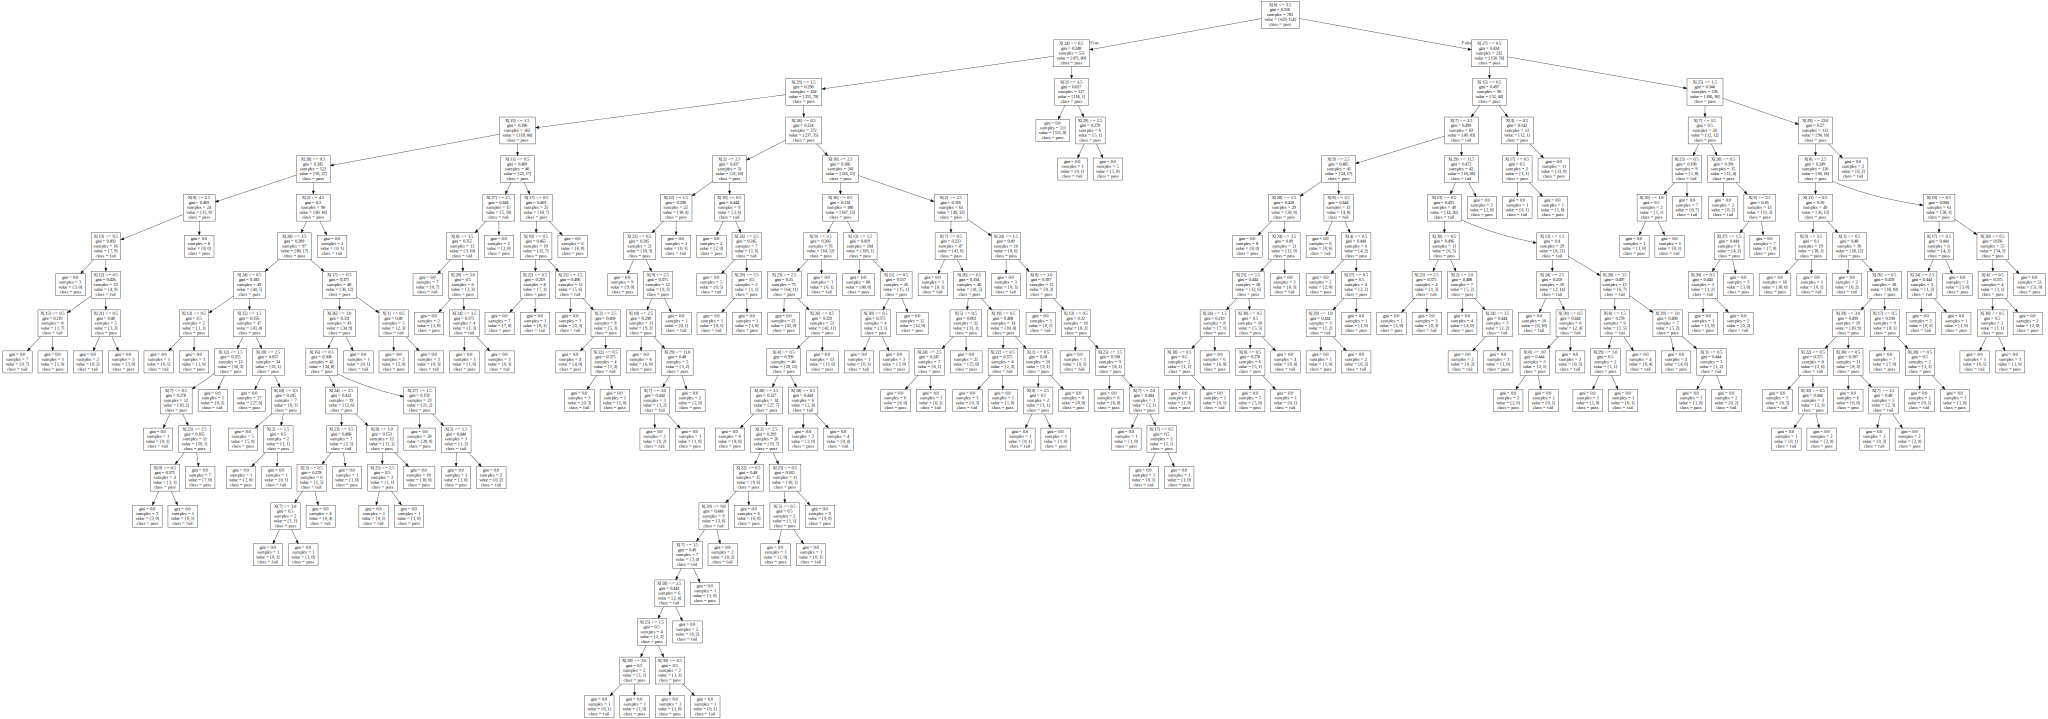

In [12]:
dot_data = tree.export_graphviz(tree_model, class_names=['pass', 'fail'])
graph = graphviz.Source(dot_data)
graph

Neural Net

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
nn_data = data.drop(columns=['G1', 'G2', 'G3'])

In [15]:
values = nn_data.values
le = preprocessing.LabelEncoder()
for i in range(32):
    values[:,i] = le.fit_transform(values[:,i])
    
nn_data = pd.DataFrame(values)

In [16]:
train, test = train_test_split(nn_data, train_size=0.75)

train = np.asarray(train).astype('float32')
test = np.asarray(test).astype('float32')

X_train = tf.convert_to_tensor(train[:,0:31])
df2 = train[:,31]
y_train = tf.convert_to_tensor(df2)

X_test = tf.convert_to_tensor(test[:,0:31])
df3 = test[:,31]
y_test = tf.convert_to_tensor(df3)

In [17]:
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(31,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=250)

Epoch 1/250
25/25 [==============================] - 1s 1ms/step - loss: 0.5318 - accuracy: 0.7716
Epoch 2/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7976
Epoch 3/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.8003
Epoch 4/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8318
Epoch 5/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8329
Epoch 6/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8292
Epoch 7/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.7952
Epoch 8/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4276 - accuracy: 0.8115
Epoch 9/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8307
Epoch 10/250
25/25 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7953
Epoch 11/

25/25 [==============================] - 0s 1ms/step - loss: 0.3063 - accuracy: 0.8599
Epoch 84/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2287 - accuracy: 0.9125
Epoch 85/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2702 - accuracy: 0.8767
Epoch 86/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2629 - accuracy: 0.8907
Epoch 87/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.8816
Epoch 88/250
25/25 [==============================] - 0s 1ms/step - loss: 0.3238 - accuracy: 0.8508
Epoch 89/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2539 - accuracy: 0.8951
Epoch 90/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2437 - accuracy: 0.9009
Epoch 91/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2563 - accuracy: 0.9021
Epoch 92/250
25/25 [==============================] - 0s 1ms/step - loss: 0.2379 - accuracy: 0.9090
Epoch 93/250


25/25 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9812
Epoch 165/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.9759
Epoch 166/250
25/25 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.9650
Epoch 167/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9785
Epoch 168/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0821 - accuracy: 0.9912
Epoch 169/250
25/25 [==============================] - 0s 1ms/step - loss: 0.1170 - accuracy: 0.9622
Epoch 170/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0824 - accuracy: 0.9826
Epoch 171/250
25/25 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.9342
Epoch 172/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.9768
Epoch 173/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 0.9766
Epoc

25/25 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 1.0000
Epoch 246/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 247/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 248/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 249/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9996
Epoch 250/250
25/25 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 1.0000


In [18]:
results = model.evaluate(X_test, y_test)
print("test loss, test accuracy:", results)

9/9 [==============================] - 0s 1ms/step - loss: 0.8425 - accuracy: 0.8199
test loss, test accuracy: [0.8425436019897461, 0.8199234008789062]
